<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/sector_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
df=pd.read_csv('/content/nifty200_analysis.csv')

In [30]:
# Step 2: Group symbols by sector
sectors = df.groupby('sector')['Symbol'].apply(list).to_dict()

# Display the resulting sectors dictionary
print("\nSectors Dictionary:")
print(sectors)


Sectors Dictionary:
{'Basic Materials': ['VEDL.NS', 'FACT.NS', 'DEEPAKNTR.NS', 'UPL.NS', 'JINDALSTEL.NS', 'GRASIM.NS', 'HINDALCO.NS', 'PIIND.NS', 'ULTRACEMCO.NS', 'ASIANPAINT.NS', 'JSWSTEEL.NS', 'PIDILITIND.NS', 'BERGEPAINT.NS', 'NMDC.NS', 'AMBUJACEM.NS', 'SAIL.NS', 'ACC.NS', 'SHREECEM.NS', 'TATASTEEL.NS', 'SRF.NS', 'DALBHARAT.NS', 'APLAPOLLO.NS', 'TATACHEM.NS'], 'Communication Services': ['INDUSTOWER.NS', 'NAUKRI.NS', 'SUNTV.NS', 'BHARTIARTL.NS', 'TATACOMM.NS', 'IDEA.NS', 'ZEEL.NS'], 'Consumer Cyclical': ['KALYANKJIL.NS', 'TRENT.NS', 'ZOMATO.NS', 'MOTHERSON.NS', 'ABFRL.NS', 'JUBLFOOD.NS', 'M&M.NS', 'BHARATFORG.NS', 'TVSMOTOR.NS', 'BALKRISIND.NS', 'BAJAJ-AUTO.NS', 'NYKAA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'PAGEIND.NS', 'INDHOTEL.NS', 'APOLLOTYRE.NS', 'BOSCHLTD.NS', 'SONACOMS.NS', 'MARUTI.NS', 'TITAN.NS', 'TATAMOTORS.NS', 'MRF.NS'], 'Consumer Defensive': ['MARICO.NS', 'COLPAL.NS', 'PATANJALI.NS', 'UNITDSPR.NS', 'HINDUNILVR.NS', 'DMART.NS', 'DABUR.NS', 'BRITANNIA.NS', 'ITC.NS', 'GODR

In [31]:


# Define date range
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365*5)  # One year ago


# Initialize a DataFrame to store sector indices
sector_indices = pd.DataFrame()

# For each sector, calculate the equal-weighted sector index
for sector, symbols in sectors.items():
    prices = pd.DataFrame()
    for symbol in symbols:
        # Download adjusted close price data
        data = yf.download(symbol, start=start_date, end=end_date)
        if data.empty:
            print(f"No data found for {symbol}")
            continue
        adj_close = data['Adj Close']
        # Normalize the price series to start at 100
        norm_price = adj_close / adj_close.iloc[0] * 100
        prices[symbol] = norm_price
    if prices.empty:
        print(f"No data found for sector {sector}")
        continue
    # Calculate the mean of the normalized prices for the sector index
    sector_index = prices.mean(axis=1)
    sector_indices[sector] = sector_index

# Get NIFTY index data
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)
if nifty_data.empty:
    nifty_data = yf.download('NIFTYBEES.NS', start=start_date, end=end_date)
    if nifty_data.empty:
        print("Unable to download NIFTY data")
        nifty_norm = None
    else:
        nifty_adj_close = nifty_data['Adj Close']
        nifty_norm = nifty_adj_close / nifty_adj_close.iloc[0] * 100
else:
    nifty_adj_close = nifty_data['Adj Close']
    nifty_norm = nifty_adj_close / nifty_adj_close.iloc[0] * 100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

['VEDL.NS', 'FACT.NS', 'DEEPAKNTR.NS', 'UPL.NS', 'JINDALSTEL.NS', 'GRASIM.NS', 'HINDALCO.NS', 'PIIND.NS', 'ULTRACEMCO.NS', 'ASIANPAINT.NS', 'JSWSTEEL.NS', 'PIDILITIND.NS', 'BERGEPAINT.NS', 'NMDC.NS', 'AMBUJACEM.NS', 'SAIL.NS', 'ACC.NS', 'SHREECEM.NS', 'TATASTEEL.NS', 'SRF.NS', 'DALBHARAT.NS', 'APLAPOLLO.NS', 'TATACHEM.NS']


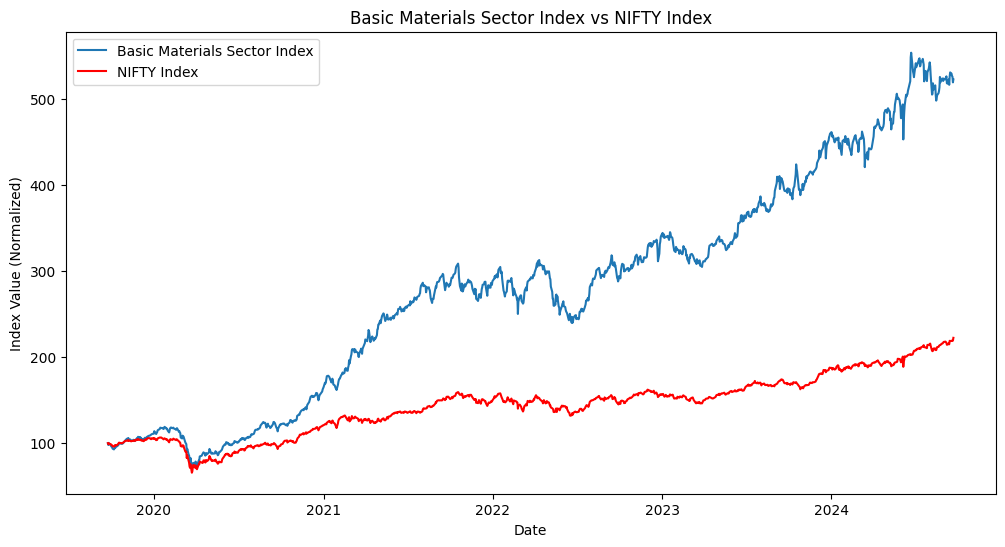

['INDUSTOWER.NS', 'NAUKRI.NS', 'SUNTV.NS', 'BHARTIARTL.NS', 'TATACOMM.NS', 'IDEA.NS', 'ZEEL.NS']


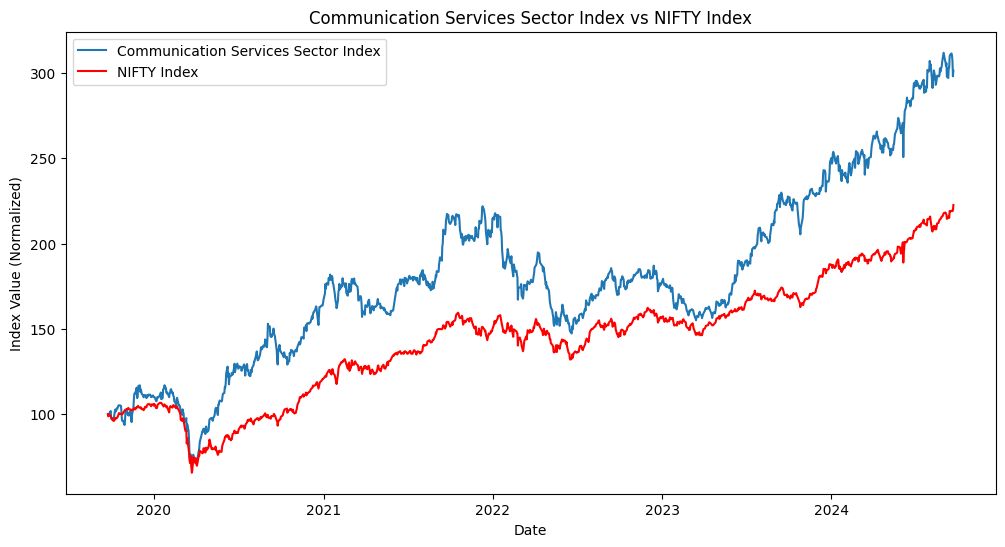

['KALYANKJIL.NS', 'TRENT.NS', 'ZOMATO.NS', 'MOTHERSON.NS', 'ABFRL.NS', 'JUBLFOOD.NS', 'M&M.NS', 'BHARATFORG.NS', 'TVSMOTOR.NS', 'BALKRISIND.NS', 'BAJAJ-AUTO.NS', 'NYKAA.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'PAGEIND.NS', 'INDHOTEL.NS', 'APOLLOTYRE.NS', 'BOSCHLTD.NS', 'SONACOMS.NS', 'MARUTI.NS', 'TITAN.NS', 'TATAMOTORS.NS', 'MRF.NS']


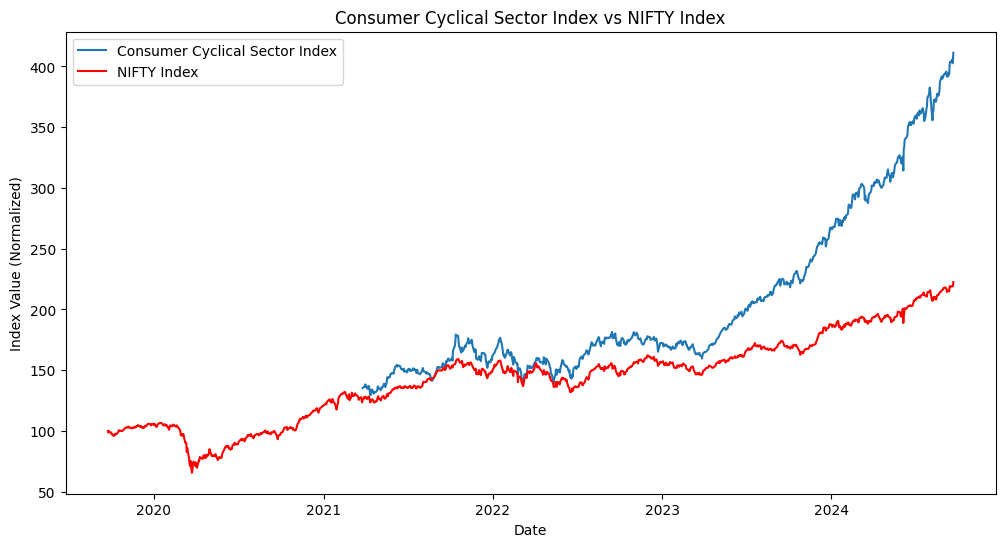

['MARICO.NS', 'COLPAL.NS', 'PATANJALI.NS', 'UNITDSPR.NS', 'HINDUNILVR.NS', 'DMART.NS', 'DABUR.NS', 'BRITANNIA.NS', 'ITC.NS', 'GODREJCP.NS', 'VBL.NS', 'TATACONSUM.NS', 'NESTLEIND.NS']


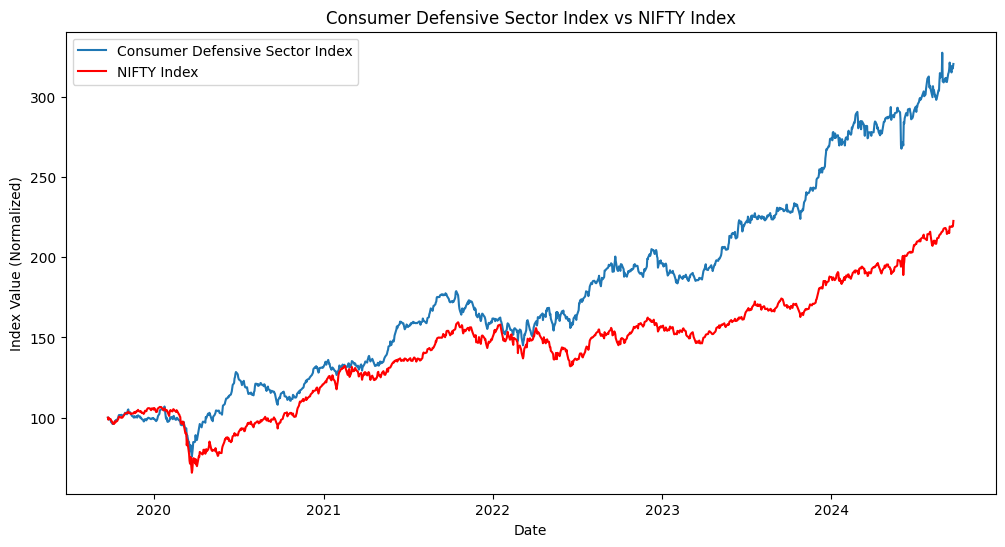

['OIL.NS', 'HINDPETRO.NS', 'PETRONET.NS', 'BPCL.NS', 'COALINDIA.NS', 'ONGC.NS', 'IOC.NS', 'RELIANCE.NS', 'ADANIENT.NS']


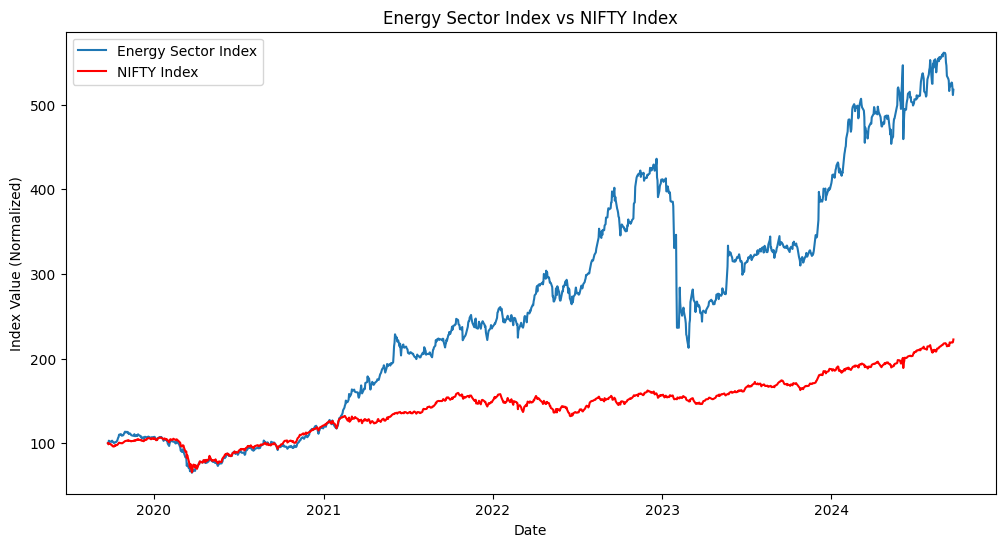

['POLICYBZR.NS', 'CHOLAFIN.NS', 'BSE.NS', 'SHRIRAMFIN.NS', 'PFC.NS', 'ICICIPRULI.NS', 'PEL.NS', 'ABCAPITAL.NS', 'RECLTD.NS', 'AUBANK.NS', 'M&MFIN.NS', 'ICICIGI.NS', 'LICHSGFIN.NS', 'FEDERALBNK.NS', 'BAJAJHLDNG.NS', 'SBILIFE.NS', 'IRFC.NS', 'LTF.NS', 'HDFCAMC.NS', 'BAJAJFINSV.NS', 'MFSL.NS', 'IDBI.NS', 'LICI.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'SBICARD.NS', 'BAJFINANCE.NS', 'HDFCBANK.NS', 'BANDHANBNK.NS', 'HDFCLIFE.NS', 'SBIN.NS', 'INDIANB.NS', 'MAHABANK.NS', 'KOTAKBANK.NS', 'INDUSINDBK.NS', 'YESBANK.NS', 'JIOFIN.NS', 'CANBK.NS', 'BANKBARODA.NS', 'IDFCFIRSTB.NS', 'PNB.NS', 'POONAWALLA.NS', 'BANKINDIA.NS', 'UNIONBANK.NS']


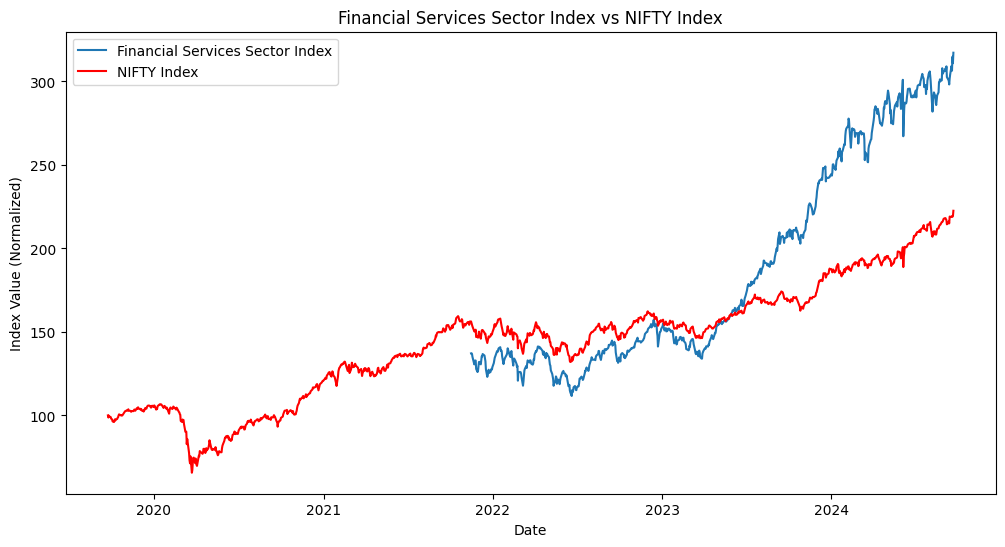

['LALPATHLAB.NS', 'DIVISLAB.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'FORTIS.NS', 'LUPIN.NS', 'TORNTPHARM.NS', 'SYNGENE.NS', 'ALKEM.NS', 'LAURUSLABS.NS', 'IPCALAB.NS', 'MAXHEALTH.NS', 'SUNPHARMA.NS', 'MANKIND.NS', 'CIPLA.NS', 'ZYDUSLIFE.NS', 'APOLLOHOSP.NS', 'DRREDDY.NS', 'GLAND.NS']


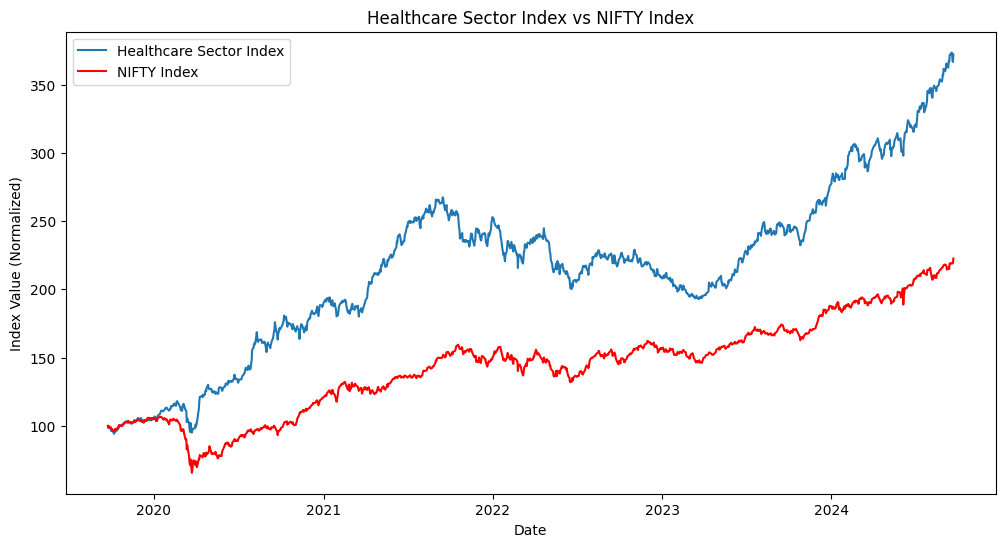

['MAZDOCK.NS', 'RVNL.NS', 'SUZLON.NS', 'VOLTAS.NS', 'BEL.NS', 'BDL.NS', 'INDIGO.NS', 'HAL.NS', 'ASHOKLEY.NS', 'CGPOWER.NS', 'SIEMENS.NS', 'POLYCAB.NS', 'ESCORTS.NS', 'CUMMINSIND.NS', 'JSWINFRA.NS', 'SUPREMEIND.NS', 'ABB.NS', 'HAVELLS.NS', 'GMRINFRA.NS', 'BHEL.NS', 'TIINDIA.NS', 'ADANIPORTS.NS', 'CONCOR.NS', 'IRCTC.NS', 'LT.NS', 'ASTRAL.NS', 'DELHIVERY.NS']


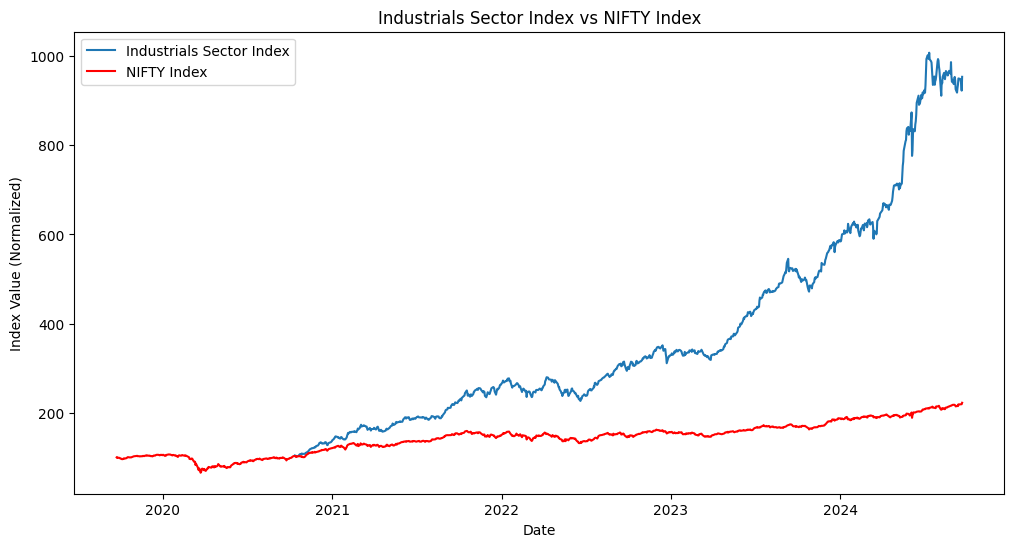

['PRESTIGE.NS', 'GODREJPROP.NS', 'OBEROIRLTY.NS', 'LODHA.NS', 'DLF.NS']


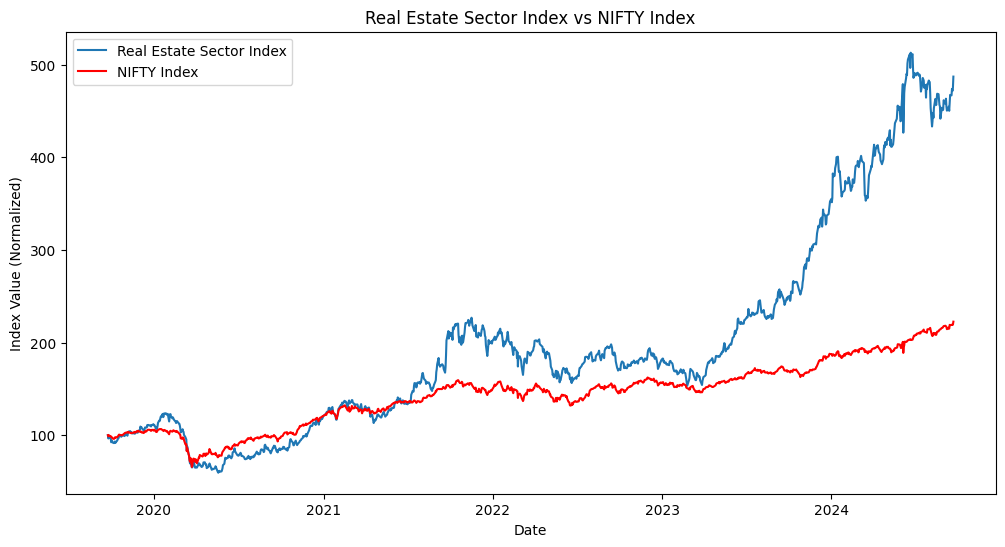

['DIXON.NS', 'PAYTM.NS', 'OFSS.NS', 'KPITTECH.NS', 'PERSISTENT.NS', 'TECHM.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTIM.NS', 'INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'LTTS.NS', 'WIPRO.NS', 'TATATECH.NS', 'TATAELXSI.NS']


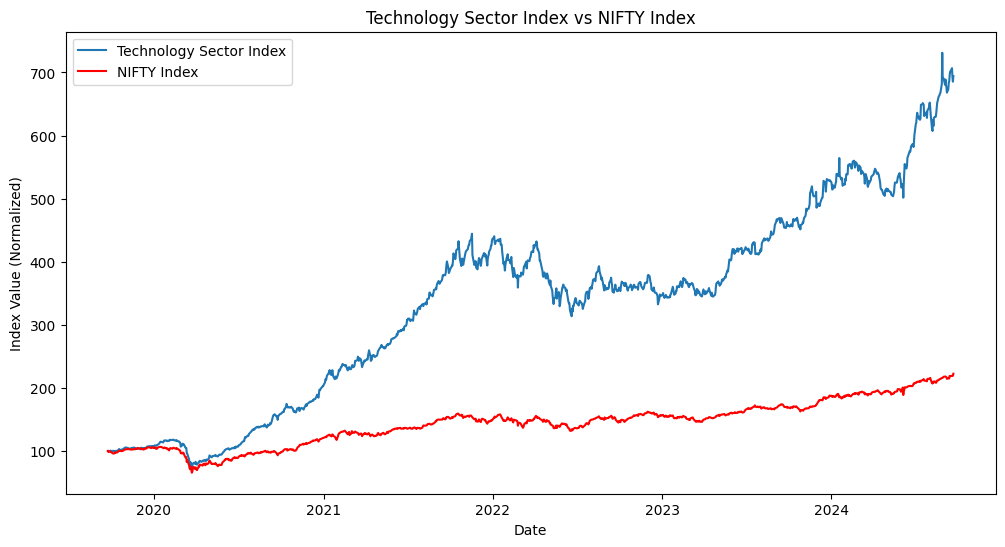

['JSWENERGY.NS', 'TORNTPOWER.NS', 'POWERGRID.NS', 'NTPC.NS', 'IGL.NS', 'GAIL.NS', 'ADANIPOWER.NS', 'GUJGASLTD.NS', 'TATAPOWER.NS', 'NHPC.NS', 'SJVN.NS', 'ADANIGREEN.NS', 'ADANIENSOL.NS', 'ATGL.NS']


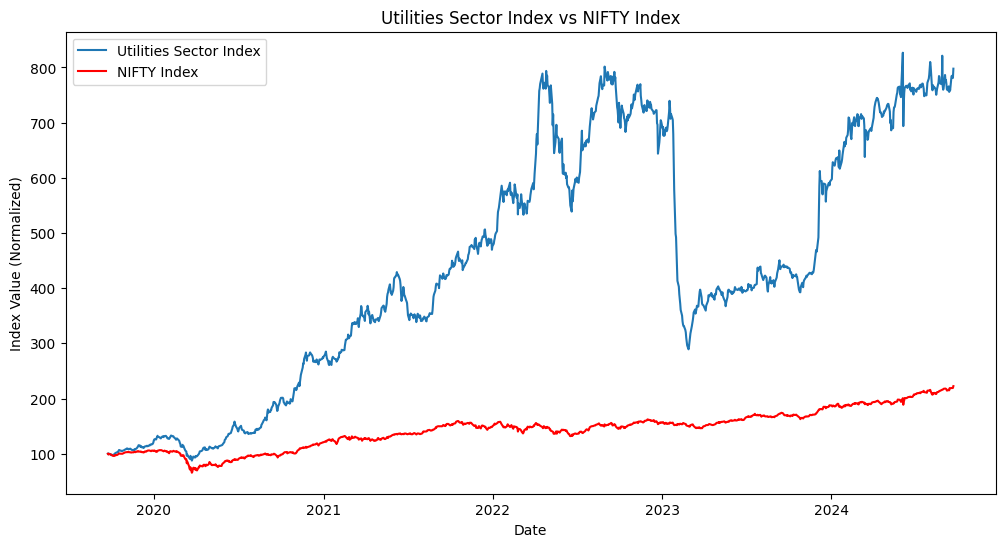

In [32]:

# Plot each sector index against the NIFTY index
for sector in sector_indices.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(sector_indices.index, sector_indices[sector], label=f'{sector} Sector Index')
    if nifty_norm is not None:
        plt.plot(nifty_norm.index, nifty_norm, label='NIFTY Index',color='r')
        print(sectors[sector_indices[sector].name])


    plt.xlabel('Date')
    plt.ylabel('Index Value (Normalized)')
    plt.title(f'{sector} Sector Index vs NIFTY Index')
    plt.legend()
    plt.show()


In [43]:
sector_indices.index = pd.to_datetime(sector_indices.index)
nifty_norm.index = pd.to_datetime(nifty_norm.index)

# Perform the division
df_divided = sector_indices.div(nifty_norm, axis=0)



Resulting DataFrame after Division (df_divided):
            Basic Materials  Communication Services  Consumer Cyclical  \
Date                                                                     
2019-09-24         1.000000                1.000000                NaN   
2019-09-25         0.991820                1.001866                NaN   
2019-09-26         1.004082                1.000614                NaN   
2019-09-27         0.995271                1.011592                NaN   
2019-09-30         0.989393                1.028331                NaN   
...                     ...                     ...                ...   
2024-09-16         2.418914                1.421624           1.842922   
2024-09-17         2.403557                1.413590           1.848704   
2024-09-18         2.403104                1.402343           1.838522   
2024-09-19         2.369491                1.358740           1.848353   
2024-09-20         2.350448                1.353630           

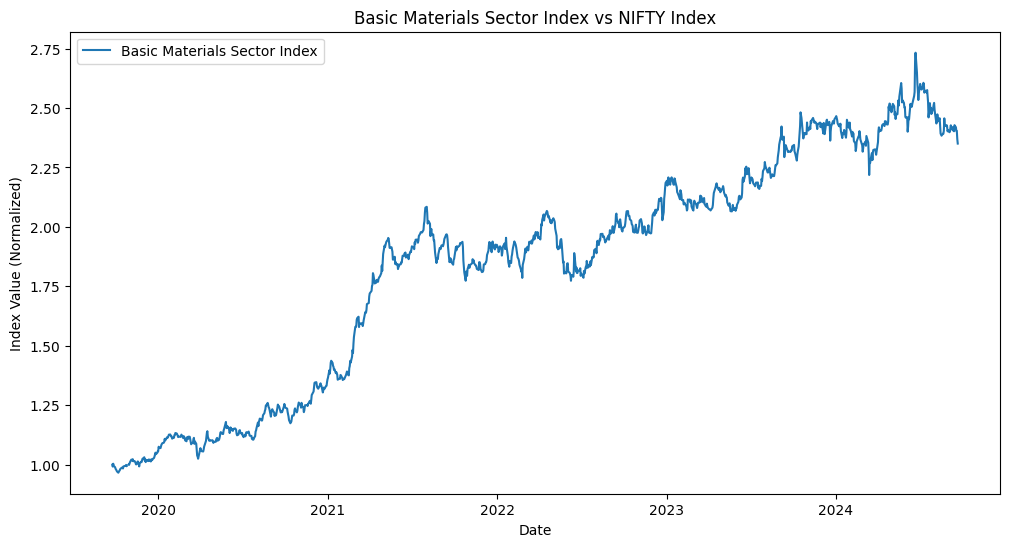

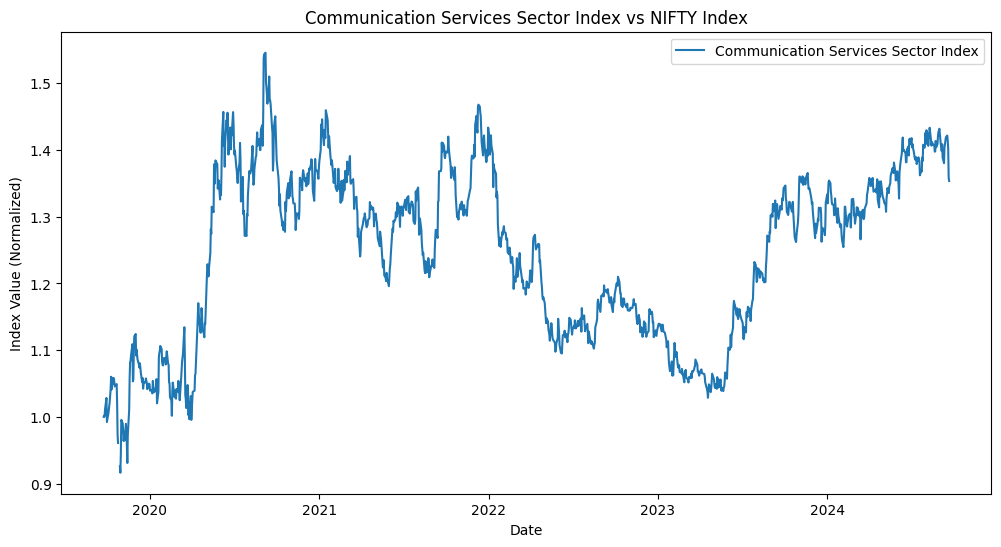

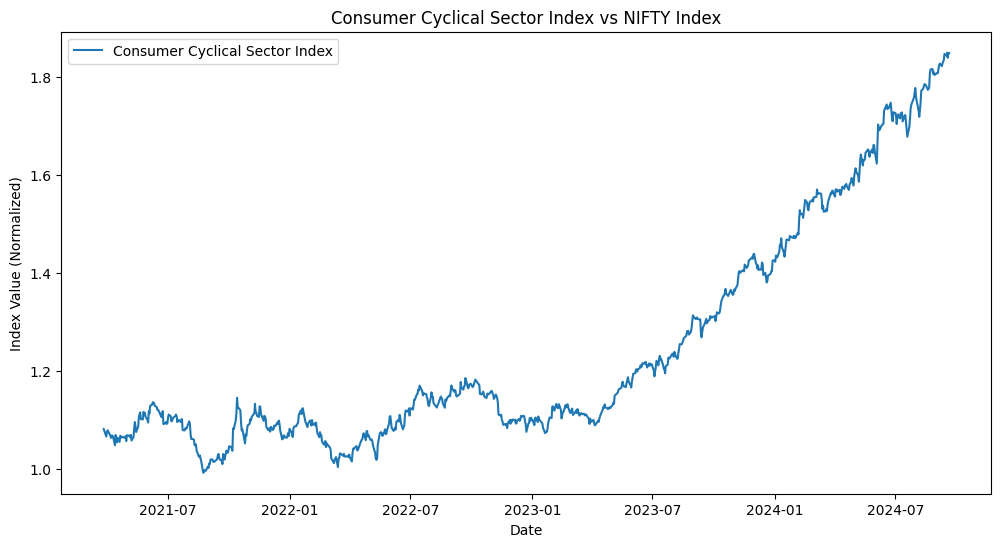

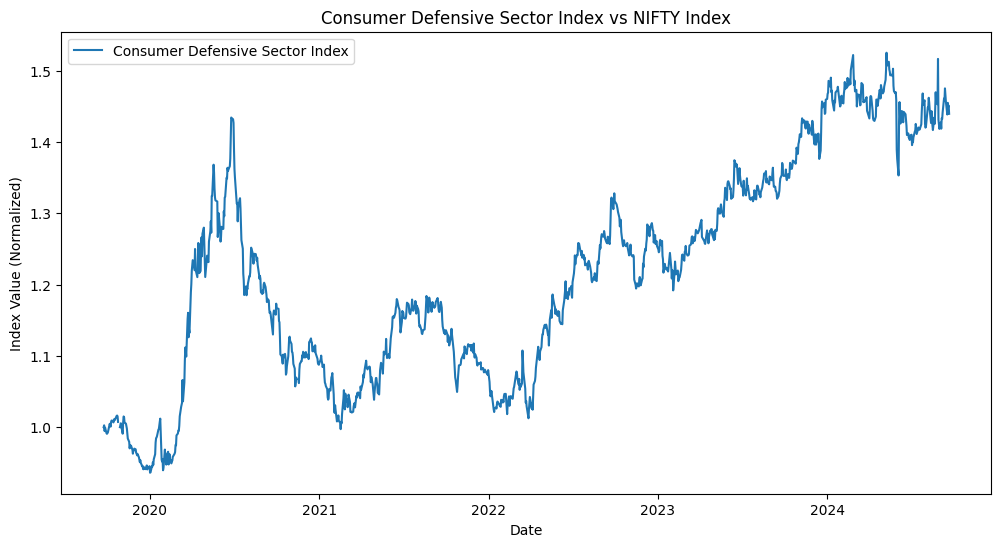

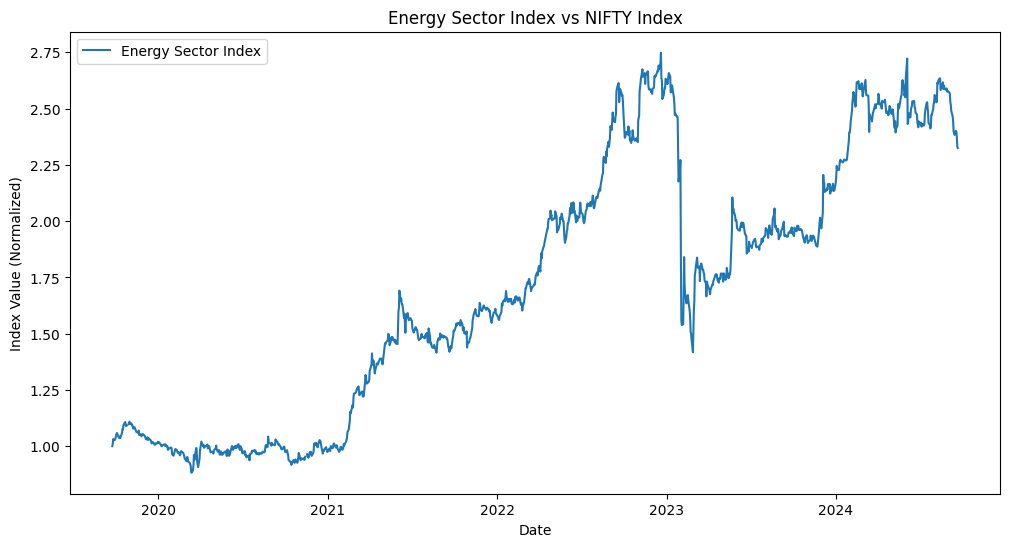

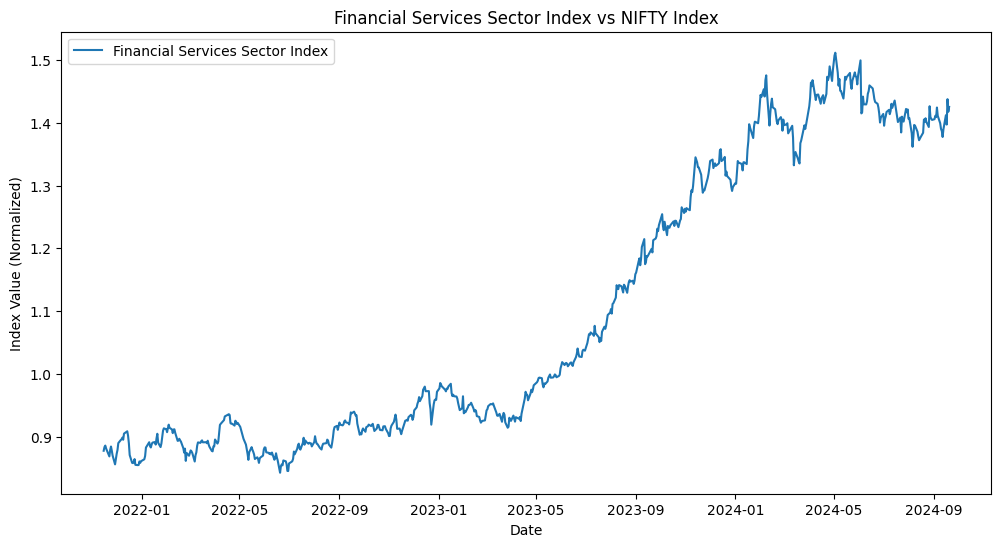

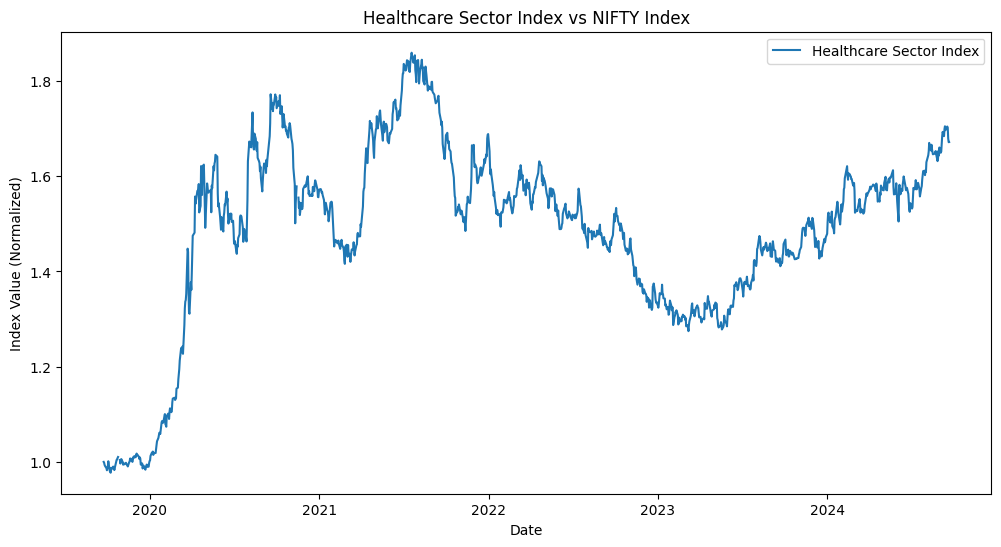

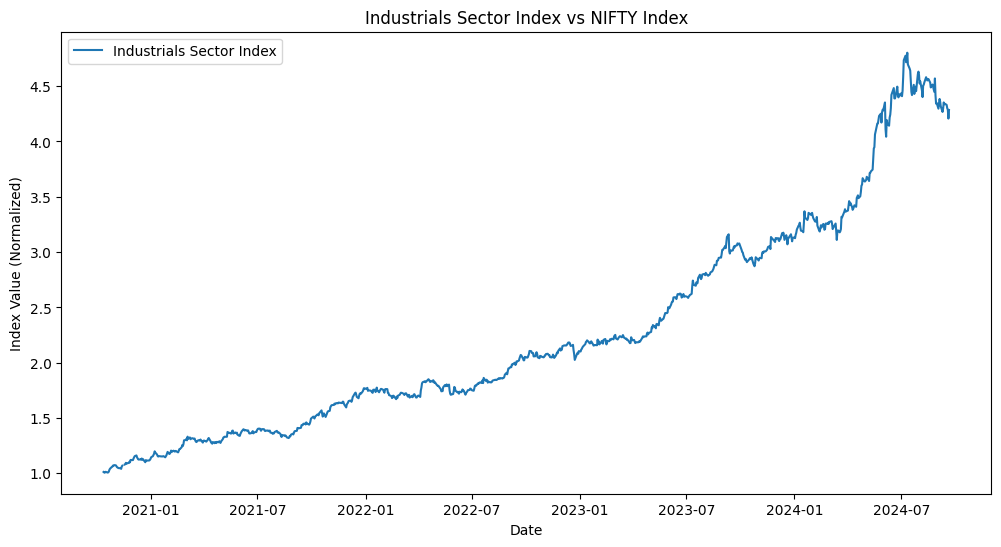

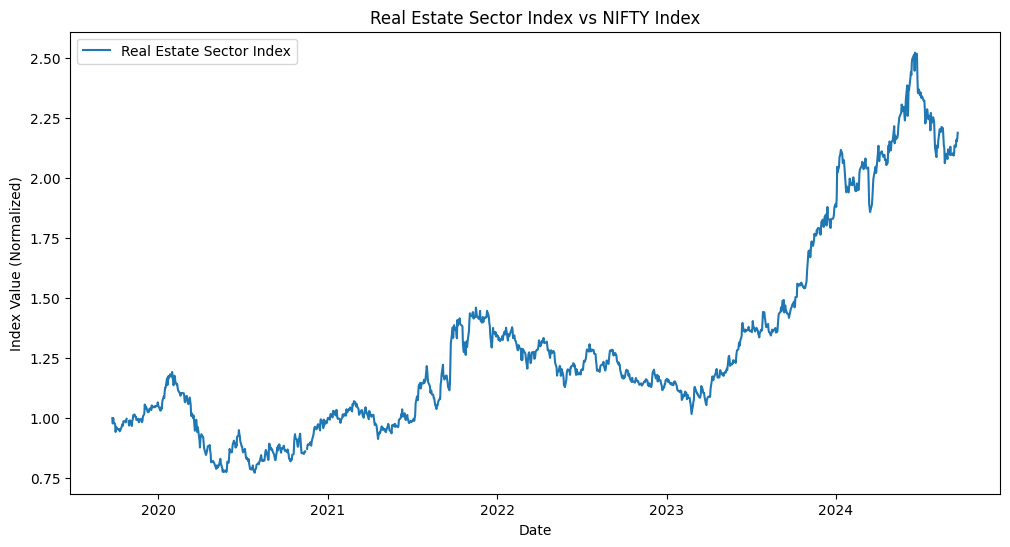

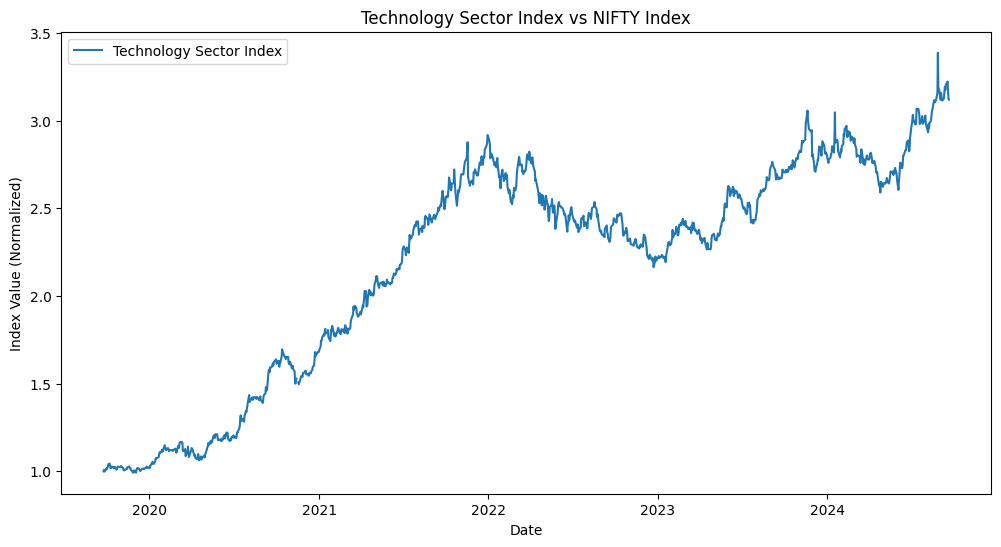

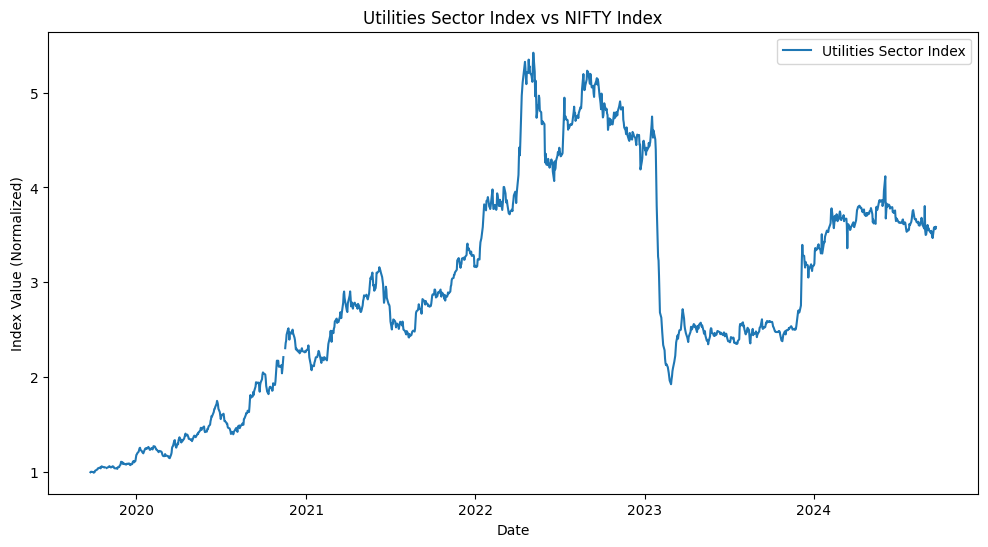

In [44]:
# Plot each sector index against the NIFTY index
for sector in df_divided.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_divided.index, df_divided[sector], label=f'{sector} Sector Index')


    plt.xlabel('Date')
    plt.ylabel('Index Value (Normalized)')
    plt.title(f'{sector} Sector Index vs NIFTY Index')
    plt.legend()
    plt.show()


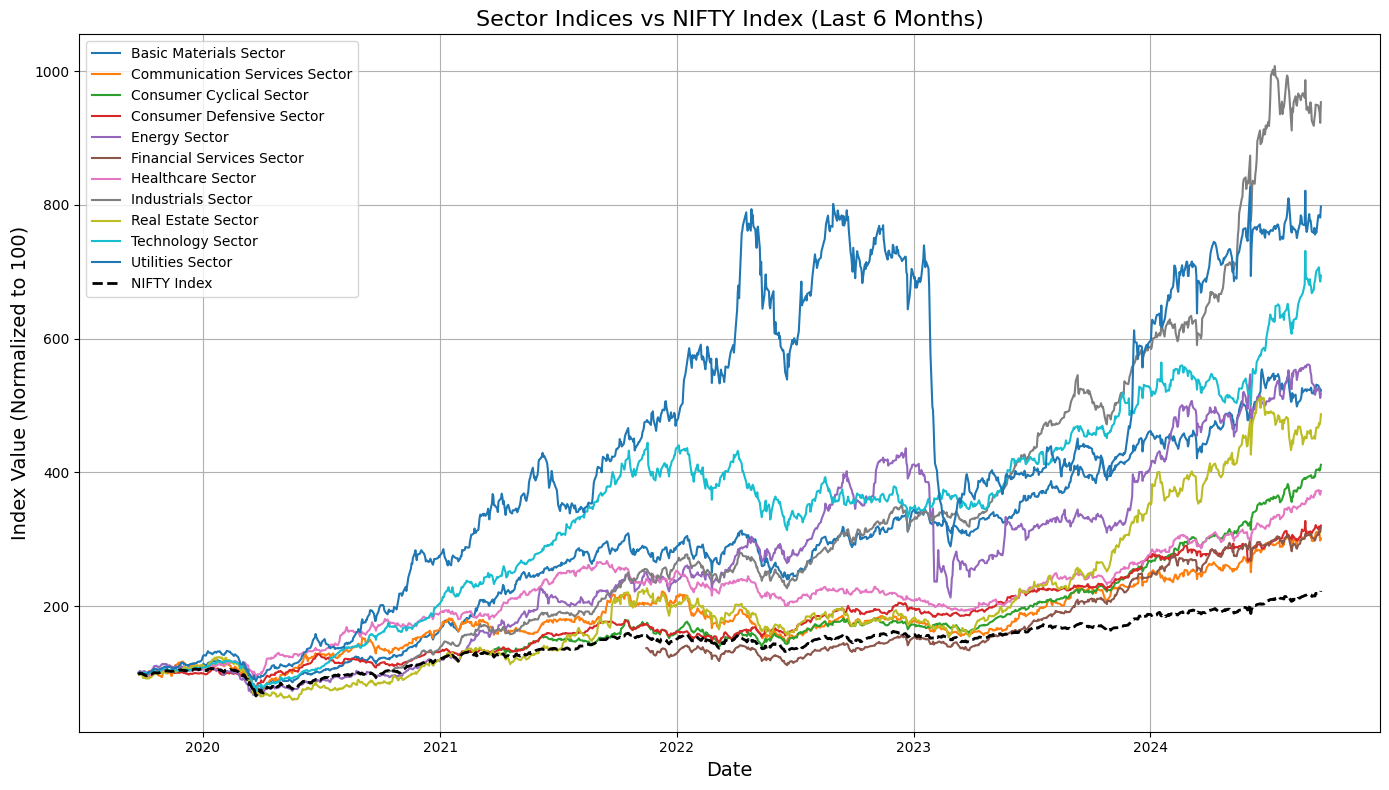

In [33]:

# Step 7: Plot all sector indices and NIFTY on a single plot
plt.figure(figsize=(14, 8))

# Plot each sector index
for sector in sector_indices.columns:
    plt.plot(sector_indices.index, sector_indices[sector], label=f'{sector} Sector')

# Plot NIFTY index if available
if nifty_norm is not None:
    plt.plot(nifty_norm.index, nifty_norm, label='NIFTY Index', linewidth=2, color='black', linestyle='--')

# Enhancements
plt.xlabel('Date', fontsize=14)
plt.ylabel('Index Value (Normalized to 100)', fontsize=14)
plt.title('Sector Indices vs NIFTY Index (Last 6 Months)', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()